In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.4.1


In [ ]:
pip install split-folders

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
train_datagen=ImageDataGenerator(rescale=1./255,
    rotation_range=40,          # Randomly rotate images in the range 0-40 degrees
    width_shift_range=0.2,      # Shift the image width-wise by a range of 0-20%
    height_shift_range=0.2,     # Shift the image height-wise by a range of 0-20%
    shear_range=0.2,            # Shear the image by 20%
    zoom_range=0.2,             # Randomly zoom the image by 20%
    horizontal_flip=True,       # Randomly flip the image horizontally
    fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/potato_output/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255,
    rotation_range=40,          # Randomly rotate images in the range 0-40 degrees
    width_shift_range=0.2,      # Shift the image width-wise by a range of 0-20%
    height_shift_range=0.2,     # Shift the image height-wise by a range of 0-20%
    shear_range=0.2,            # Shear the image by 20%
    zoom_range=0.2,             # Randomly zoom the image by 20%
    horizontal_flip=True,       # Randomly flip the image horizontally
    fill_mode='nearest')
validation_generator=validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/potato_output/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 215 images belonging to 3 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255,
    rotation_range=40,          # Randomly rotate images in the range 0-40 degrees
    width_shift_range=0.2,      # Shift the image width-wise by a range of 0-20%
    height_shift_range=0.2,     # Shift the image height-wise by a range of 0-20%
    shear_range=0.2,            # Shear the image by 20%
    zoom_range=0.2,             # Randomly zoom the image by 20%
    horizontal_flip=True,       # Randomly flip the image horizontally
    fill_mode='nearest')
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/potato_output/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 431 images belonging to 3 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, (3, 3), padding="same", activation="relu",  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout added here

    layers.Conv2D(64, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout added here

    layers.Conv2D(128, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),

    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),  # Dropout before the output layer
    layers.Dense(3, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,215,875 (4.64 MB)

 Trainable params: 1,215,875 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [ ]:
1506/32

In [ ]:
215/32


In [ ]:
history=model.fit(train_generator,
          steps_per_epoch=47,
          batch_size=32,
          validation_data=validation_generator,
          validation_steps=6,
          verbose=1,
          epochs=20
          )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 436s 8s/step - accuracy: 0.4466 - loss: 1.2610 - val_accuracy: 0.4531 - val_loss: 1.1457
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.3438 - loss: 1.1881

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - accuracy: 0.3438 - loss: 1.1881 - val_accuracy: 0.5652 - val_loss: 1.2652
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 604ms/step - accuracy: 0.4805 - loss: 1.1116 - val_accuracy: 0.4479 - val_loss: 1.1042
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3750 - loss: 1.1550 - val_accuracy: 0.6087 - val_loss: 1.1083
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 602ms/step - accuracy: 0.5477 - loss: 1.0007 - val_accuracy: 0.6927 - val_loss: 0.7727
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6875 - loss: 0.6667 - val_accuracy: 0.6087 - val_loss: 0.9079
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 600ms/step - accuracy: 0.7169 - loss: 0.7520 - val_accuracy: 0.6979 - val_loss: 0.7324
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6528 - val_accuracy: 0.6957 - val_loss: 0.7100
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 598ms/step - accuracy: 0.7882 - loss: 0.6259 - val_accuracy: 0.8802 - val_

In [ ]:
scores=model.evaluate(test_generator)
scores


14/14 ━━━━━━━━━━━━━━━━━━━━ 176s 14s/step - accuracy: 0.9151 - loss: 0.2906


[0.28283625841140747, 0.9234338998794556]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

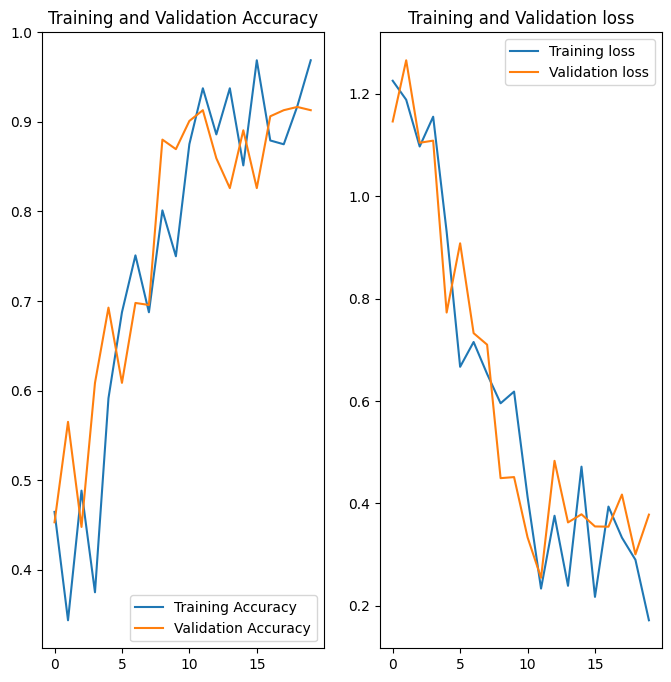

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20),acc,label='Training Accuracy')
plt.plot(range(20),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(20),loss,label='Training loss')
plt.plot(range(20),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [ ]:
class_names=['Early Blight','Late Blight','Healthy']

first image to predict
actual label: Late Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
predicted label: Late Blight


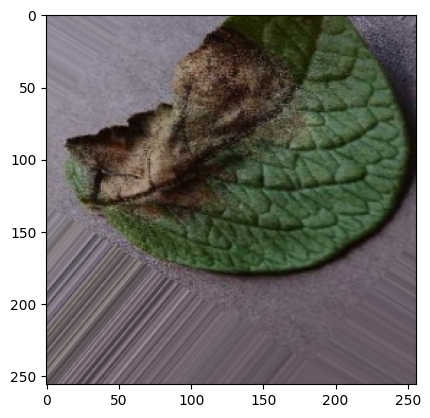

In [ ]:
import numpy as np
for images_batch,labels_batch in test_generator:
  first_image=images_batch[0]
  first_label=int(labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)

  print("predicted label:",class_names[np.argmax(batch_prediction[0])])
  break

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i])
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


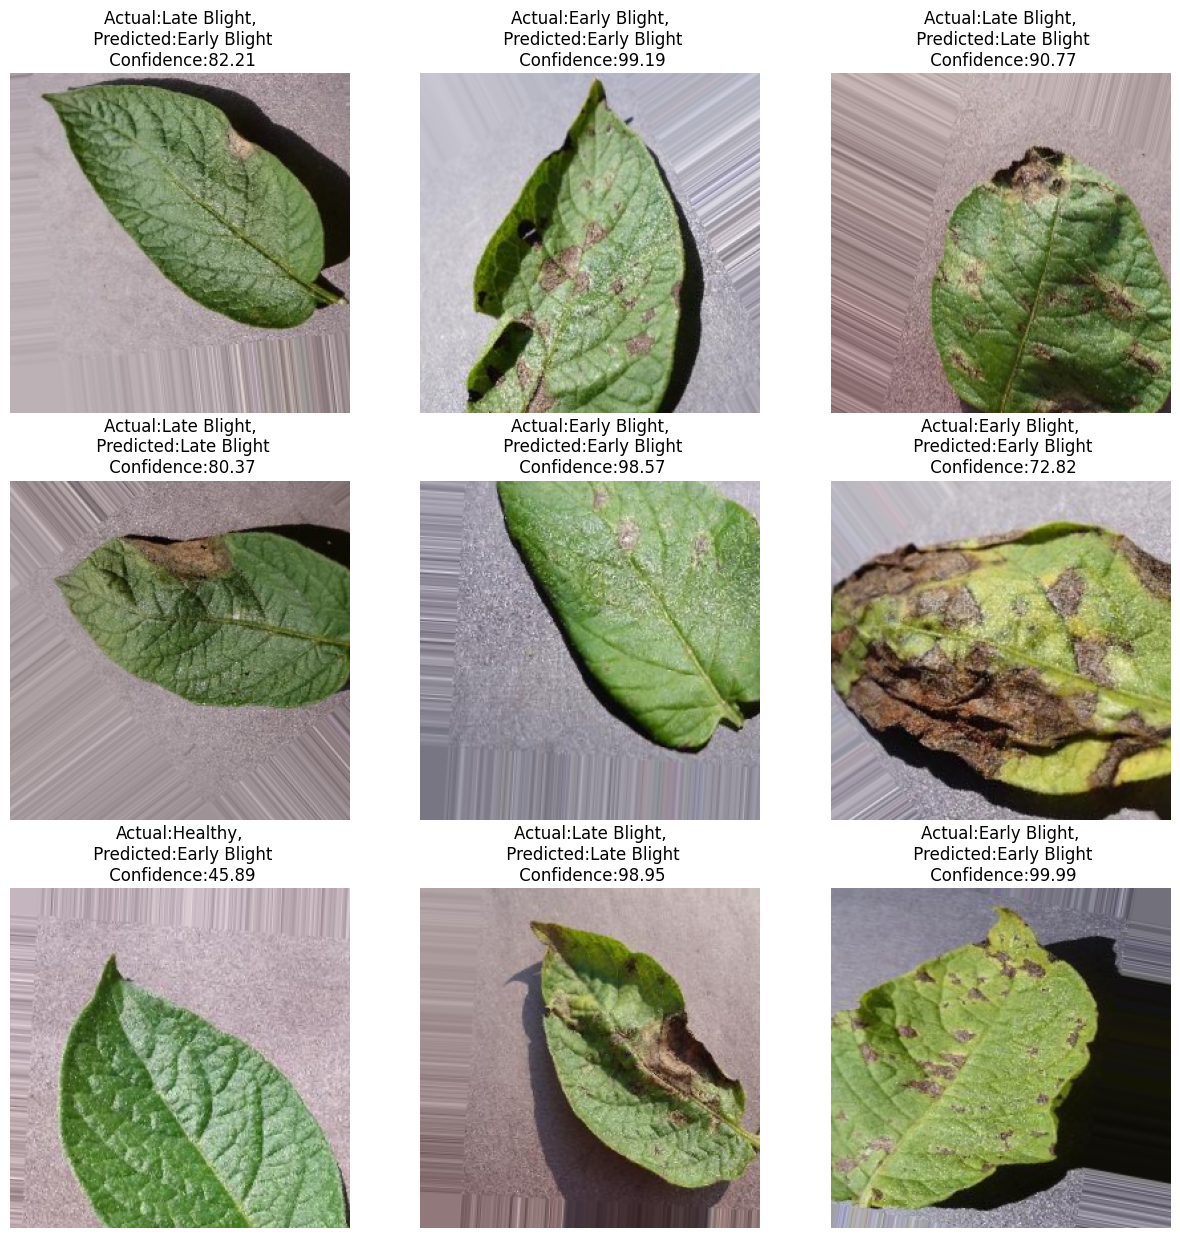

In [ ]:
plt.figure(figsize=(15,15))
for images,label in test_generator:
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class,confidence= predict(model,images[i])
    actual_class=class_names[int(label[i])]

    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}\n Confidence:{confidence}"  )
    plt.axis("off")
  break


In [ ]:
model.save('/content/drive/MyDrive/potato06-11.keras')

In [ ]:
import os
os._exit(0)
